<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/Stationarity_Test_of_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller ,kpss
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [ ]:
series=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',header=0,index_col=0)
series.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Function for visual inspection
def visualize_time_series(data):
  plt.figure(figsize=(5,3))
  plt.plot(data,label="Time Series")
  plt.title(' Visual Inspection of Time Series')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend()
  plt.show()

In [ ]:
#Function for summery statistics
def summary_statistics(data):
  values=data.values

  #getting the count to split the dataset into 3
  parts=int(len(values)/3)

  #splitting the data into three parts
  part_1,part_2,part_3=values[0:parts],values[parts:(parts*2)],values[(parts*2):(parts*3)]

  #calculated the mean of separated three
  #three parts of data indivisually
  mean_1,mean_2,mean_3=part_1.mean(),part_2.mean(),part_3.mean()

  #calculated the variance of separated three
  #three parts of data indivisually
  var_1,var_2,var_3=part_1.var(),part_2.var(),part_3.var()

  #printing the mean of three groups
  print('mean1=%f\mean2=%f\mean3=%f'%(mean_1,mean_2,mean_3))

  #printing the variance of three groups
  print('variance1=%f\variance2=%f\variance3=%f'%(var_1,var_2,var_3))


#function for summary statistics
def summary_statistics1(data,splits):
  values=data.values

  #getting the count to split the dataset into 3
  parts=int(len(values)/splits)
  print("Part         Mean           Variance")
  for i in range(splits):
    #splitting the data into three parts
    part_i=values[(parts*i):((i+1)*parts)]
    mean_i,var_i=part_i.mean(),part_i.var()
    # printing the mean of three groups
    print('%    d         %f       %f'%(i+1,mean_i,var_i))

In [ ]:
# ADF Test
def adf_test(data):
  result=adfuller(data)
  print('ADF Test:')
  print(f"Test statistic: {result[0]}")
  print(f"p-value: {result[1]}")
  print(f"Critical values: {result[4]}")
  if result[1] <=0.05:
    print("Stationary(Reject null hypothesis)")
  else:
    print("Not stationary(Fail to reject null hypothesis")

In [ ]:
#KPPS Test
def kpps_test(data):
  result,p_value,legs,critical_values=kpss(data,regression='c')
  print('KPSS Test:')
  print(f"Test statistic: {result}")
  print(f"p-value: {p_value}")
  print(f"Critical values: {critical_values}")
  if p_value <=0.05:
    print(" Not Stationary(Reject null hypothesis)")
  else:
    print("stationary(Fail to reject null hypothesis")

Performing Visual Inspection....


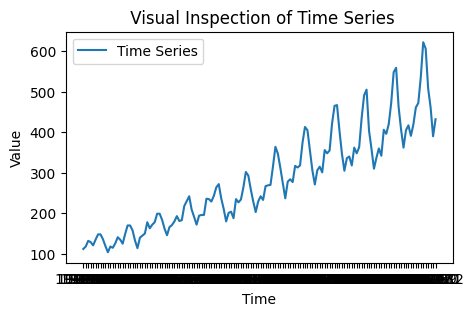

Performing Summary Statistics....
mean1=158.375000\mean2=269.041667\mean3=413.479167
variance1=1071.859375ariance2=3041.289931ariance3=6033.624566
Part         Mean           Variance
 1         158.375000       1071.859375
 2         269.041667       3041.289931
 3         413.479167       6033.624566
Performing ADF Test....
ADF Test:
Test statistic: 0.8153688792060528
p-value: 0.9918802434376411
Critical values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
Not stationary(Fail to reject null hypothesis
Performing KPPS Test....
KPSS Test:
Test statistic: 1.6513122354165206
p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
 Not Stationary(Reject null hypothesis)


In [ ]:
#visual inspection
print('Performing Visual Inspection....')
visualize_time_series(series)
print("==================================================================================")

#Summary statistics
print('Performing Summary Statistics....')
summary_statistics(series)
print("==================================================================================")
summary_statistics1(series,3)
print("==================================================================================")

#ADF Test
print('Performing ADF Test....')
adf_test(series)
print("==================================================================================")

#KPPS Test
print('Performing KPPS Test....')
kpps_test(series)
print("==================================================================================")

CONCLUSION
___________________
From the above stationarity test :
	**1.	Visual Inspection:** The time series plot shows an increasing trend and variance over time, indicating non-stationarity.
	**2.	Summary Statistics:** The mean and variance increase over different segments, which further suggests non-stationarity.
	**3.	Augmented Dickey-Fuller (ADF) Test:**
	•	Test statistic: 0.8153
	•	p-value: 0.99 (very high)
	•	Since the p-value is much greater than 0.05, we fail to reject the null hypothesis, meaning the series is not stationary.
	**4.	KPSS Test:**
	•	Test statistic: 1.6513
	•	p-value: 0.01
	•	Since the test statistic is higher than the critical values, we reject the null hypothesis, indicating the series is not stationary.

Finally:

The time series is not stationary, as confirmed by both the ADF and KPSS tests. To make it stationary,  may need to apply differencing, log transformation, or seasonal decomposition before proceeding with time series modeling.

                                                        <completed>